In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [3]:
data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df.head()

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# y_cols_1 = list(data_df_full.columns[8:12])
# y_cols_2 = list(data_df_full.columns[68:72])

In [5]:
#y = data_df[y_cols_1+y_cols_2]

In [6]:
X = data_df['x']
y = data_df[y_cols]

In [7]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y',]


Y = len(y_cols)
#Y = 8
print(f'L={L}, Y={Y}')

L=201, Y=64


In [9]:
# instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)

gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)



2022-08-16 08:19:11.832766: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [11]:
print(N_y)

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
TiteSeq_02_bin1     5094914
                     ...   
TiteSeq_15_bin4      621457
TiteSeq_16_bin1    23064475
TiteSeq_16_bin2     1582135
TiteSeq_16_bin3     3128968
TiteSeq_16_bin4      725998
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [12]:
bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,250000]]))
#bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,200000]]))

bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0.000000,5.192957
1,5.192957,7.244228
2,7.244228,9.259131
3,9.259131,12.429216


I don't know how to obtain these values. I based them roughly on Figure 2 from Star et al

In [13]:
# mu_neg = np.log10(50)
# mu_pos = np.log10(70000)

# sigma_neg = 2.0
# sigma_pos = 2.0

# a = np.log10(10**(mu_pos) - 10**mu_neg)

mu_neg = np.log10(50)
mu_pos = np.log10(70000)

# mu_pos = 15.0 kd_WT = 1.0208168951388276e-05, trains well, scale kindof off.
# mu_pos = 12.5 kd_WT = 1.2361944572128138e-08
#mu_pos = 11.5 # Kd_WT = 1.6880063531355497e-10
#mu_pos = 11.0 # Kd_WT = 2.1441348615444062e-11
# mu_pos = 10 # kd_WT = 3.6290623182157056e-14, trains well but scale of
# mu_pos = 7.5 # trains well-ish but scale is really off
#mu_pos = 5.0 # doesn't work


# mu_pos = 11.5 # kd_WT = 4.09167643846012e-11
# mu_neg = 3 # kd_WT = 4.09167643846012e-11

mu_neg = 1.0
mu_pos = 8.0

sigma_neg = 2.0
sigma_pos = 2.0


a = np.log10(10**(mu_pos) - 10**mu_neg)

# a = 20, inference works, but scale of kd is off.

In [14]:
a

7.99999995657055

In [15]:
mu_pos, mu_neg

(8.0, 1.0)

In [16]:
f_y_upper_bounds

array([ 5.19295685,  7.24422752,  9.25913054, 12.4292162 ])

In [17]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

In [18]:
mp_list = [mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4*mp_idx:4*mp_idx+4],
                                                         c=cs[mp_idx],
                                                         a=a,
                                                         Y=4,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,)
           for mp_idx in range(len(y_cols)//4)
          ]

In [19]:
# model = mavenn.Model2(gpmap=gpmap,
#                       mp_list=mp_list)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [20]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [21]:
#y_train[y_cols_2]

In [22]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[0:4]].values,
                       y_train[y_cols[4:8]].values,
                       y_train[y_cols[8:12]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[52:56]].values,                   
                       y_train[y_cols[56:60]].values,                                      
                       y_train[y_cols[60:64]].values,                                                         
                      ],

               shuffle=True)

N = 165,825 observations set as training data.
Using 19.9% for validation.
Data shuffled.
Time to set data: 52.6 sec.


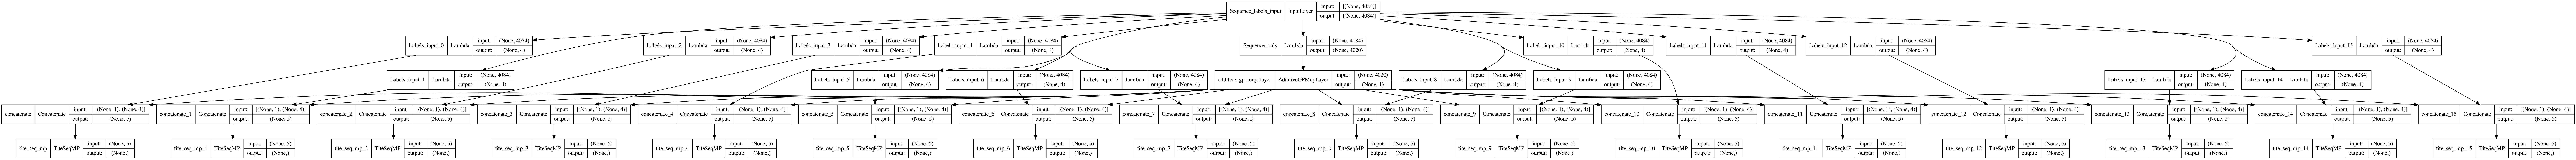

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='titeseq_mp_16_heads.png')

In [24]:

# Fit model to data
model.fit(learning_rate=.001,
          epochs=50,
          batch_size=400,
          try_tqdm = False,
          early_stopping=False,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/50
332/332 [==============================] - 35s 46ms/step - loss: 5915737.0000 - tite_seq_mp_loss: 1896004.7500 - tite_seq_mp_1_loss: 334136.5938 - tite_seq_mp_2_loss: 331457.4688 - tite_seq_mp_3_loss: 443770.2188 - tite_seq_mp_4_loss: 326568.5312 - tite_seq_mp_5_loss: 331928.9688 - tite_seq_mp_6_loss: 347350.7188 - tite_seq_mp_7_loss: 277517.9062 - tite_seq_mp_8_loss: 242459.4375 - tite_seq_mp_9_loss: 206528.0156 - tite_seq_mp_10_loss: 188469.2344 - tite_seq_mp_11_loss: 259989.6250 - tite_seq_mp_12_loss: 201355.3750 - tite_seq_mp_13_loss: 163484.9375 - tite_seq_mp_14_loss: 168361.8281 - tite_seq_mp_15_loss: 196355.4062 - I_var: -3.6151 - val_loss: 4280621.5000 - val_tite_seq_mp_loss: 1808180.2500 - val_tite_seq_mp_1_loss: 108709.0156 - val_tite_seq_mp_2_loss: 106471.4141 - val_tite_seq_mp_3_loss: 152695.1719 - val_tite_seq_mp_4_loss: 125152.3359 - val_tite_seq_mp_5_loss: 140839.0469 - val_tite_seq_mp_6_loss: 156536.6406 - val_tite_seq_mp_7_loss: 162614.6719 - val_tite_seq_mp

332/332 [==============================] - 7s 22ms/step - loss: 4356829.5000 - tite_seq_mp_loss: 1895993.3750 - tite_seq_mp_1_loss: 115801.3281 - tite_seq_mp_2_loss: 100252.6016 - tite_seq_mp_3_loss: 130238.1641 - tite_seq_mp_4_loss: 103411.8750 - tite_seq_mp_5_loss: 126382.4141 - tite_seq_mp_6_loss: 148885.4219 - tite_seq_mp_7_loss: 160647.5938 - tite_seq_mp_8_loss: 175672.8750 - tite_seq_mp_9_loss: 189489.7969 - tite_seq_mp_10_loss: 189592.4688 - tite_seq_mp_11_loss: 258264.7500 - tite_seq_mp_12_loss: 208905.1094 - tite_seq_mp_13_loss: 172229.1875 - tite_seq_mp_14_loss: 175780.0469 - tite_seq_mp_15_loss: 205282.9688 - I_var: -3.7964 - val_loss: 4162231.2500 - val_tite_seq_mp_loss: 1808180.2500 - val_tite_seq_mp_1_loss: 104628.5469 - val_tite_seq_mp_2_loss: 91304.0859 - val_tite_seq_mp_3_loss: 121982.8906 - val_tite_seq_mp_4_loss: 98895.6250 - val_tite_seq_mp_5_loss: 122363.1172 - val_tite_seq_mp_6_loss: 144502.4531 - val_tite_seq_mp_7_loss: 156119.9844 - val_tite_seq_mp_8_loss: 17050

332/332 [==============================] - 7s 21ms/step - loss: 4261533.5000 - tite_seq_mp_loss: 1895985.5000 - tite_seq_mp_1_loss: 126421.7812 - tite_seq_mp_2_loss: 102085.8594 - tite_seq_mp_3_loss: 118406.9766 - tite_seq_mp_4_loss: 88298.2500 - tite_seq_mp_5_loss: 108351.7891 - tite_seq_mp_6_loss: 130923.8125 - tite_seq_mp_7_loss: 145132.5938 - tite_seq_mp_8_loss: 164381.3750 - tite_seq_mp_9_loss: 181615.3906 - tite_seq_mp_10_loss: 185551.6250 - tite_seq_mp_11_loss: 255029.2969 - tite_seq_mp_12_loss: 207366.1250 - tite_seq_mp_13_loss: 171548.6562 - tite_seq_mp_14_loss: 175372.5156 - tite_seq_mp_15_loss: 205060.7188 - I_var: -3.7940 - val_loss: 4067569.5000 - val_tite_seq_mp_loss: 1808180.2500 - val_tite_seq_mp_1_loss: 119431.6797 - val_tite_seq_mp_2_loss: 95363.0156 - val_tite_seq_mp_3_loss: 110390.9375 - val_tite_seq_mp_4_loss: 83395.0859 - val_tite_seq_mp_5_loss: 103160.3125 - val_tite_seq_mp_6_loss: 125253.1797 - val_tite_seq_mp_7_loss: 139515.8125 - val_tite_seq_mp_8_loss: 158249

332/332 [==============================] - 7s 21ms/step - loss: 4196050.0000 - tite_seq_mp_loss: 1895991.2500 - tite_seq_mp_1_loss: 135499.0781 - tite_seq_mp_2_loss: 107203.4141 - tite_seq_mp_3_loss: 117478.0156 - tite_seq_mp_4_loss: 84130.6641 - tite_seq_mp_5_loss: 99216.8203 - tite_seq_mp_6_loss: 119576.0234 - tite_seq_mp_7_loss: 132374.9531 - tite_seq_mp_8_loss: 152684.4375 - tite_seq_mp_9_loss: 171717.5938 - tite_seq_mp_10_loss: 179326.1094 - tite_seq_mp_11_loss: 249234.2031 - tite_seq_mp_12_loss: 203884.9844 - tite_seq_mp_13_loss: 169613.3281 - tite_seq_mp_14_loss: 174008.8750 - tite_seq_mp_15_loss: 204107.0625 - I_var: -3.7696 - val_loss: 4012318.2500 - val_tite_seq_mp_loss: 1808180.2500 - val_tite_seq_mp_1_loss: 129316.9219 - val_tite_seq_mp_2_loss: 101750.1094 - val_tite_seq_mp_3_loss: 111680.1406 - val_tite_seq_mp_4_loss: 81145.8984 - val_tite_seq_mp_5_loss: 95759.7109 - val_tite_seq_mp_6_loss: 115655.3438 - val_tite_seq_mp_7_loss: 127939.6406 - val_tite_seq_mp_8_loss: 147122.

332/332 [==============================] - 7s 21ms/step - loss: 4152139.5000 - tite_seq_mp_loss: 1895836.3750 - tite_seq_mp_1_loss: 140268.9375 - tite_seq_mp_2_loss: 110117.6641 - tite_seq_mp_3_loss: 119340.8516 - tite_seq_mp_4_loss: 84126.2656 - tite_seq_mp_5_loss: 96261.5547 - tite_seq_mp_6_loss: 114697.7422 - tite_seq_mp_7_loss: 124716.5469 - tite_seq_mp_8_loss: 143883.8125 - tite_seq_mp_9_loss: 163449.1719 - tite_seq_mp_10_loss: 173529.4219 - tite_seq_mp_11_loss: 243514.7500 - tite_seq_mp_12_loss: 200344.5938 - tite_seq_mp_13_loss: 167224.4688 - tite_seq_mp_14_loss: 172188.6719 - tite_seq_mp_15_loss: 202632.6406 - I_var: -3.7371 - val_loss: 4010491.5000 - val_tite_seq_mp_loss: 1808180.2500 - val_tite_seq_mp_1_loss: 171581.4531 - val_tite_seq_mp_2_loss: 130698.5469 - val_tite_seq_mp_3_loss: 128890.1328 - val_tite_seq_mp_4_loss: 86952.4688 - val_tite_seq_mp_5_loss: 89871.8438 - val_tite_seq_mp_6_loss: 104712.8906 - val_tite_seq_mp_7_loss: 112575.6641 - val_tite_seq_mp_8_loss: 131160.

332/332 [==============================] - 7s 22ms/step - loss: 4136649.5000 - tite_seq_mp_loss: 1895969.0000 - tite_seq_mp_1_loss: 149686.8906 - tite_seq_mp_2_loss: 118848.0000 - tite_seq_mp_3_loss: 127071.7109 - tite_seq_mp_4_loss: 87854.7656 - tite_seq_mp_5_loss: 96114.1484 - tite_seq_mp_6_loss: 112460.5625 - tite_seq_mp_7_loss: 119377.0391 - tite_seq_mp_8_loss: 136486.6562 - tite_seq_mp_9_loss: 155563.6406 - tite_seq_mp_10_loss: 167059.8594 - tite_seq_mp_11_loss: 237243.6250 - tite_seq_mp_12_loss: 196487.0000 - tite_seq_mp_13_loss: 164954.8594 - tite_seq_mp_14_loss: 170388.9375 - tite_seq_mp_15_loss: 201076.7344 - I_var: -3.6981 - val_loss: 3973979.0000 - val_tite_seq_mp_loss: 1808180.2500 - val_tite_seq_mp_1_loss: 151628.4688 - val_tite_seq_mp_2_loss: 118342.5625 - val_tite_seq_mp_3_loss: 124196.4531 - val_tite_seq_mp_4_loss: 85913.2266 - val_tite_seq_mp_5_loss: 92259.1484 - val_tite_seq_mp_6_loss: 107986.1641 - val_tite_seq_mp_7_loss: 114521.6094 - val_tite_seq_mp_8_loss: 131703.

332/332 [==============================] - 6s 17ms/step - loss: 4121486.2500 - tite_seq_mp_loss: 1895998.7500 - tite_seq_mp_1_loss: 152844.7188 - tite_seq_mp_2_loss: 122036.1875 - tite_seq_mp_3_loss: 130587.2188 - tite_seq_mp_4_loss: 91510.3828 - tite_seq_mp_5_loss: 97792.6562 - tite_seq_mp_6_loss: 112775.5938 - tite_seq_mp_7_loss: 116988.5000 - tite_seq_mp_8_loss: 132531.3906 - tite_seq_mp_9_loss: 150759.1719 - tite_seq_mp_10_loss: 162298.6875 - tite_seq_mp_11_loss: 232156.9844 - tite_seq_mp_12_loss: 193012.9062 - tite_seq_mp_13_loss: 162108.8594 - tite_seq_mp_14_loss: 168379.4844 - tite_seq_mp_15_loss: 199696.5469 - I_var: -3.6720 - val_loss: 3969372.0000 - val_tite_seq_mp_loss: 1808180.2500 - val_tite_seq_mp_1_loss: 156107.8750 - val_tite_seq_mp_2_loss: 123112.3438 - val_tite_seq_mp_3_loss: 128855.7578 - val_tite_seq_mp_4_loss: 88444.5469 - val_tite_seq_mp_5_loss: 93010.3750 - val_tite_seq_mp_6_loss: 107885.5547 - val_tite_seq_mp_7_loss: 112408.0078 - val_tite_seq_mp_8_loss: 128138.

332/332 [==============================] - 5s 14ms/step - loss: 4111444.7500 - tite_seq_mp_loss: 1896021.1250 - tite_seq_mp_1_loss: 154009.6719 - tite_seq_mp_2_loss: 124597.3672 - tite_seq_mp_3_loss: 133154.5312 - tite_seq_mp_4_loss: 92883.4219 - tite_seq_mp_5_loss: 98645.8750 - tite_seq_mp_6_loss: 113193.7812 - tite_seq_mp_7_loss: 116707.0156 - tite_seq_mp_8_loss: 130390.6328 - tite_seq_mp_9_loss: 147906.2500 - tite_seq_mp_10_loss: 159751.9219 - tite_seq_mp_11_loss: 229481.6562 - tite_seq_mp_12_loss: 190391.7031 - tite_seq_mp_13_loss: 159890.0469 - tite_seq_mp_14_loss: 166293.6875 - tite_seq_mp_15_loss: 198118.0938 - I_var: -3.6451 - val_loss: 3955400.5000 - val_tite_seq_mp_loss: 1808180.2500 - val_tite_seq_mp_1_loss: 148027.2812 - val_tite_seq_mp_2_loss: 118394.6016 - val_tite_seq_mp_3_loss: 127834.8359 - val_tite_seq_mp_4_loss: 88799.5547 - val_tite_seq_mp_5_loss: 94348.1797 - val_tite_seq_mp_6_loss: 109843.1484 - val_tite_seq_mp_7_loss: 113056.4453 - val_tite_seq_mp_8_loss: 128165.

332/332 [==============================] - 5s 14ms/step - loss: 4107688.5000 - tite_seq_mp_loss: 1895996.0000 - tite_seq_mp_1_loss: 155872.9844 - tite_seq_mp_2_loss: 127035.3203 - tite_seq_mp_3_loss: 136552.3906 - tite_seq_mp_4_loss: 95411.4531 - tite_seq_mp_5_loss: 99288.4219 - tite_seq_mp_6_loss: 113522.0859 - tite_seq_mp_7_loss: 115661.5156 - tite_seq_mp_8_loss: 128413.6797 - tite_seq_mp_9_loss: 145348.5312 - tite_seq_mp_10_loss: 157472.6094 - tite_seq_mp_11_loss: 227301.3125 - tite_seq_mp_12_loss: 188846.9219 - tite_seq_mp_13_loss: 158717.2656 - tite_seq_mp_14_loss: 165119.5625 - tite_seq_mp_15_loss: 197118.0469 - I_var: -3.6289 - val_loss: 3947852.7500 - val_tite_seq_mp_loss: 1808180.2500 - val_tite_seq_mp_1_loss: 139467.1094 - val_tite_seq_mp_2_loss: 113838.0000 - val_tite_seq_mp_3_loss: 127480.3516 - val_tite_seq_mp_4_loss: 89773.3594 - val_tite_seq_mp_5_loss: 96031.5625 - val_tite_seq_mp_6_loss: 111662.2266 - val_tite_seq_mp_7_loss: 114503.9297 - val_tite_seq_mp_8_loss: 128859.

In [25]:

# # Fit model to data
# model.fit(learning_rate=.0005,
#           epochs=500,
#           batch_size=400,
#           try_tqdm = False,
#           early_stopping=False,
#           early_stopping_patience=10,
#           linear_initialization=False)a

On test data:


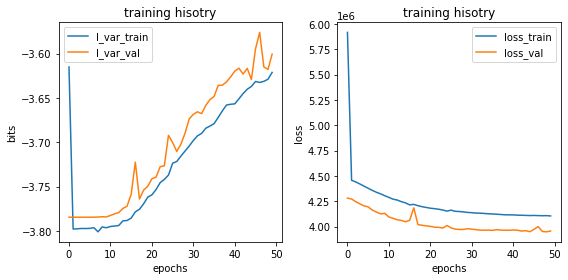

In [26]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [27]:
model.history['loss'][-1]/1e6

4.104504

In [28]:
phi = gpmap.x_to_phi(x_test)
theta = np.squeeze(gpmap.weights[1].numpy())


In [29]:
theta

array([[ 0.48188317, -0.43468866, -0.38361418, ..., -0.2728286 ,
         0.06641322, -0.45760632],
       [ 0.15107858, -0.06653703, -0.0233611 , ...,  0.1405102 ,
        -0.27969676, -0.28766093],
       [-0.20937625, -0.4238391 ,  0.3161779 , ...,  0.04563943,
        -0.12298959, -0.09876364],
       ...,
       [ 0.72663045,  0.19468857,  0.1977915 , ...,  0.28312713,
         0.64076436,  0.28761822],
       [-0.14258015, -0.04476834, -0.10454012, ..., -0.11504361,
        -0.42256498,  0.3067439 ],
       [ 0.9608129 ,  0.9626    ,  0.50186145, ..., -0.3367719 ,
         1.0909499 ,  1.0439379 ]], dtype=float32)

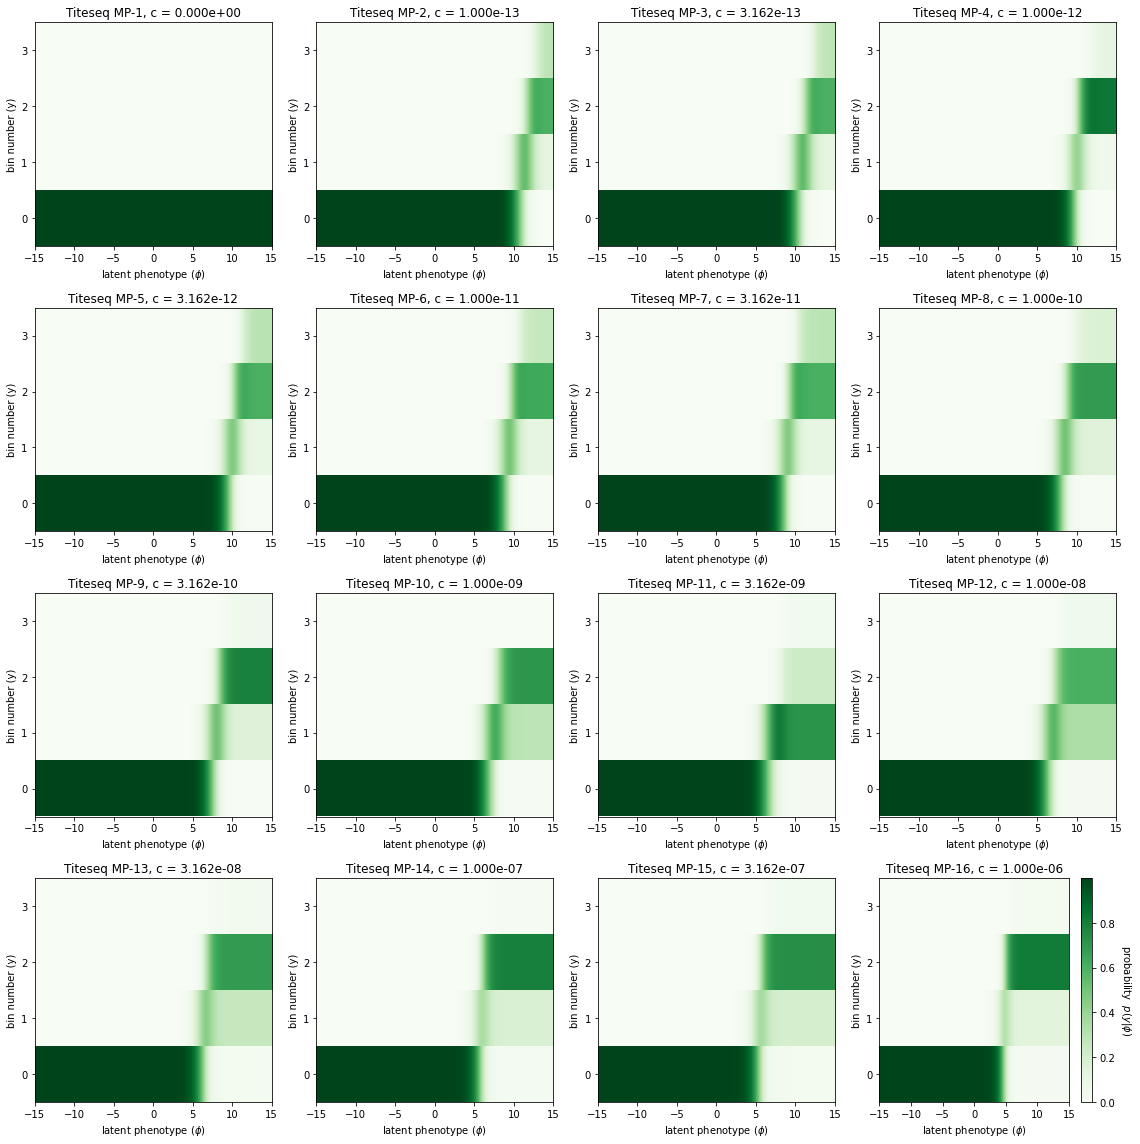

In [30]:
# Get G-P map parameters in matrix form


# Create grid in phi space
phi_lim = [-15, 15]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1}, c = {cs[mp_counter]:.3e}')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

fig.savefig(f'ace2rbd_Titeseq_measurment_prcoess_mu_pos_{(mu_pos):.3f}.png',dpi=300,bbox_inches='tight')


In [31]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_avg'].values[0:20]

bloom_bind_df.head()


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.03,-0.09,0.03,0.00,-0.10,-0.04,-0.02,-0.07,-0.01,-0.05,-0.02,0.00,-0.03,0.01,-0.02,-0.03,0.06,-0.04,-0.16,-0.06
1,0.00,-0.09,-0.02,0.08,-0.22,-0.08,0.04,0.00,-0.05,0.00,0.00,0.00,0.06,-0.02,0.00,-0.04,-0.03,0.00,-0.03,-0.03
2,-0.01,-0.14,-0.01,-0.15,-0.15,-0.07,-0.07,-0.06,-0.01,-0.01,-0.02,-0.06,0.03,0.02,0.00,-0.08,0.00,-0.05,-0.21,-0.07
3,-0.03,-0.11,0.07,0.01,-0.22,-0.03,-0.02,-0.20,-0.03,-0.20,-0.05,0.00,-0.18,0.01,0.00,-0.06,-0.04,-0.07,-0.24,-0.09
4,0.04,-0.11,0.00,0.06,-0.03,-0.08,-0.03,-0.02,-0.03,0.00,0.01,0.03,0.06,-0.02,-0.01,0.01,0.02,-0.08,-0.05,-0.02


In [32]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_exp_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    temp_df['expr_lib1']
    bloom_exp_df.loc[site-1] = temp_df['expr_avg'].values[0:20]
    
bloom_exp_df.head()    

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.11,-1.26,-0.44,-0.31,-0.70,-0.25,-0.61,-0.85,-0.20,-0.75,-0.75,0.00,-0.21,-0.53,-0.44,-0.33,-0.34,-0.61,-1.12,-1.02
1,0.00,-0.12,0.03,0.01,-0.10,0.14,0.05,0.00,-0.06,-0.03,-0.02,0.05,-0.17,0.07,-0.04,-0.03,-0.04,0.02,-0.33,-0.07
2,-0.37,-0.93,-0.27,-0.31,-0.89,-0.41,-0.29,-1.03,-0.20,-0.55,-0.47,-0.35,-0.28,-0.35,-0.54,-0.04,0.00,-0.56,-0.63,-0.62
3,-0.12,-0.57,-0.04,-0.05,-0.97,-0.21,-0.12,-0.67,-0.02,-0.72,-0.40,0.00,-0.55,-0.08,-0.12,-0.19,-0.02,-0.47,-1.01,-0.61
4,-0.01,-0.38,-0.09,0.11,-0.16,-0.16,-0.10,-0.16,0.02,0.00,-0.15,-0.08,0.09,-0.05,-0.14,-0.08,-0.08,-0.10,-0.13,-0.12


In [33]:
theta_df = pd.DataFrame(theta,columns=alphabet)

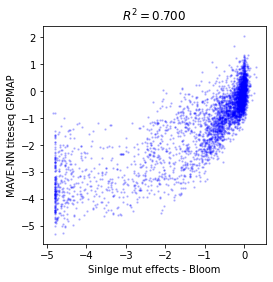

In [34]:
fig, axs = plt.subplots(1,1,figsize=[4,4])

# Left panel: draw logo using logomaker
ax = axs
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.fillna(0).values,theta_df.fillna(0).values,s=2,alpha=0.2,color='blue')
ax.set_xlabel('Sinlge mut effects - Bloom')
ax.set_ylabel('MAVE-NN titeseq GPMAP')
ax.set_title(f'$R^2 = {Rsq:.3f}$')
# ax.set_xticks(np.arange(0,201,5))
# ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
plt.show()

In [35]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

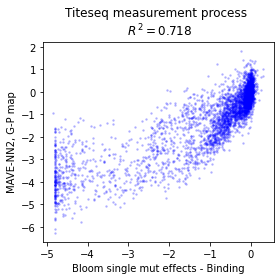

In [36]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Bloom single mut effects - Binding')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

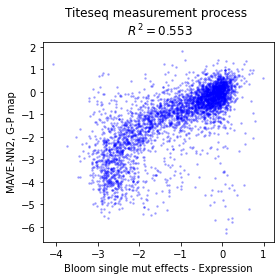

In [37]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_exp_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_exp_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.25,color='blue')

#lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Bloom single mut effects - Expression')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_expression_comparison.png',dpi=200,bbox_inches='tight')

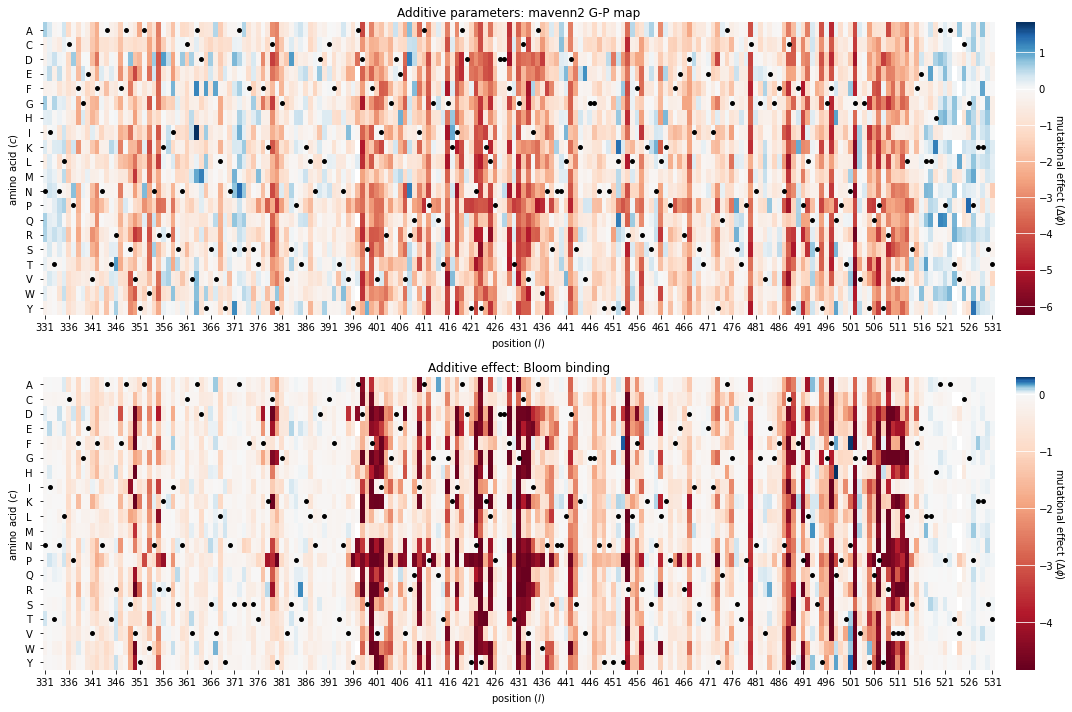

In [38]:

# Create figure
fig, axs = plt.subplots(2,1, figsize=(15,10))

# Draw heatmap
ax = axs[0]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_lc_consensus_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                #clim = [-5,0.5],
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive parameters: mavenn2 G-P map')
heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
#fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only_heatmap.png',dpi=300,bbox_inches='tight')

bloom_exp_df
# Create figure
#fig, ax = plt.subplots(1,1, figsize=(15,5))

# Draw heatmap
ax = axs[1]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_bind_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                #clim = [-5,0.5],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom binding')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_titeseq_heatmap_comparisons.png',dpi=300,bbox_inches='tight')

In [39]:
theta_lc_consensus_dm_df = pd.read_csv('discrete_monotonic_ace2rbd_binding.csv')

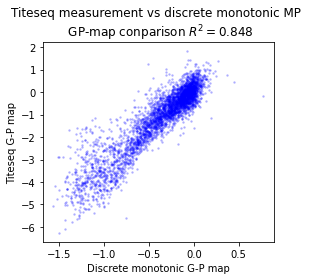

In [40]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(theta_lc_consensus_dm_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(theta_lc_consensus_dm_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

#lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Discrete monotonic G-P map')
plt.title(f'Titeseq measurement vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
plt.ylabel('Titeseq G-P map')
plt.tight_layout()
plt.savefig('Titeseq_discrete_monotonic_binding_comparison.png',dpi=200,bbox_inches='tight')

Get titration curves

In [41]:
#phi = gpmap.x_to_phi(x_test)

#a = mp_list[0].get_weights()[0][0]

def mu_of_phi(c, 
              a=a,
              phi=phi,
              mu_neg=mu_neg):

    K_a_of_phi = 10**(phi)
    B = 10**(mu_neg)
    A = 10**(a)
    
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi


In [42]:
# plt.figure(figsize=(5,5))

# #cs_ = np.arange(0.01,30,0.01)
# cs_bloom = np.arange(10**(-13),10**(-3),10**(-6))

# for _ in np.random.choice(np.arange(0,len(phi)),size=10):
#     plt.plot(cs_bloom,mu_of_phi(c=10**(cs_bloom),phi=phi[_]),'o-')
#     #plt.plot(cs_bloom,mu_of_phi(c=cs_bloom,phi=phi[_]),'o-')
    
    
# plt.xlabel('log concentration - grid (inferred)',fontsize=12)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.ylabel('$\mu(\phi)$',fontsize=15)
# #plt.ylim(0,4)

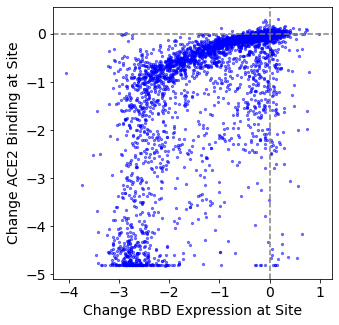

In [43]:
plt.figure(figsize=(5,5))
plt.scatter(bloom_exp_df.values.ravel(),bloom_bind_df.values.ravel(), color='blue',s=5,alpha=0.5)
plt.xlabel('Change RBD Expression at Site',fontsize=14)
plt.ylabel('Change ACE2 Binding at Site',fontsize=14)
plt.axvline(0,ls='--',color='gray')
plt.axhline(0,ls='--',color='gray')
plt.tick_params(labelsize=14)
plt.savefig('Bloom_binding_vs_expression.png',dpi=200,bbox_inches='tight')

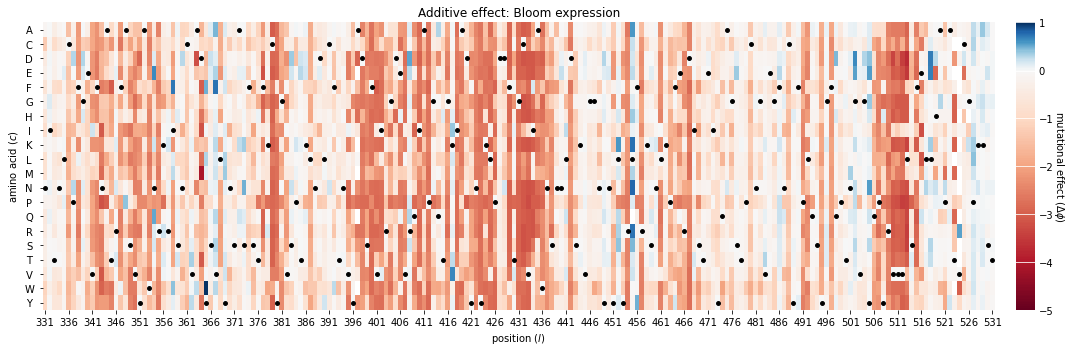

In [44]:

# Create figure
fig, ax = plt.subplots(1,1, figsize=(15,5))


heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_exp_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                clim = [-5,1],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom expression')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_heatmap_bloom_expression.png',dpi=300,bbox_inches='tight')

### Compute $K_d$ values

In [45]:
#phi = gpmap.x_to_phi(x_test)

#a = mp_list[0].get_weights()[0][0]

def mu_of_phi(c, 
              a=a,
              phi=phi,
              mu_neg=mu_neg):

    K_a_of_phi = 10**(phi)
    B = 10**(mu_neg)
    A = 10**(a)
    
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi


In [46]:
def _x_to_mat(x, alphabet):
    return (np.array(list(x))[:, np.newaxis] == alphabet[np.newaxis, :]).astype(float)

In [47]:
WT_seq = model.x_stats['consensus_seq']

single_mutants = []

for idx,WT_char in enumerate(WT_seq):
    #print(idx)
    for mutant in model.alphabet:
#         if mutant==WT_seq[idx]:
#             continue
#         else:
        temp_WT_list = list(WT_seq)
        temp_WT_list[idx] = mutant
        single_mutant = ''.join(temp_WT_list)
        single_mutants.append(single_mutant)
            

In [48]:
phi_single_mutants = gpmap.x_to_phi(single_mutants)

In [49]:
mavenn2_Kd = pd.DataFrame(1/(10**phi_single_mutants.reshape(201,20)),columns=model.alphabet)

In [50]:
# fig, axs = plt.subplots(1,2,figsize=(10,5))


# #lims=[10**-12,10**-1]
# #ax.plot(lims,lims,'--',color='orange')

# #Rsq = np.corrcoef(10**bloom_bind_df.values.ravel(),10**(phi_single_mutants))[0,1]**2
# ax = axs[0]
# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(10**bloom_bind_df.values.ravel(),
#            10**(phi_single_mutants),
#             color='blue',s=5,alpha=0.25)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xlabel('$K_d$ (Starr et al)',fontsize=14)
# ax.set_ylabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)


# ax = axs[1]
# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(10**bloom_exp_df.values.ravel(),
#            10**(phi_single_mutants),
#             color='blue',s=5,alpha=0.25)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xlabel('Expression (Starr et al)',fontsize=14)
# ax.set_ylabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

# # ax.set_xlim(lims)
# # ax.set_ylim(lims)
# fig.tight_layout()

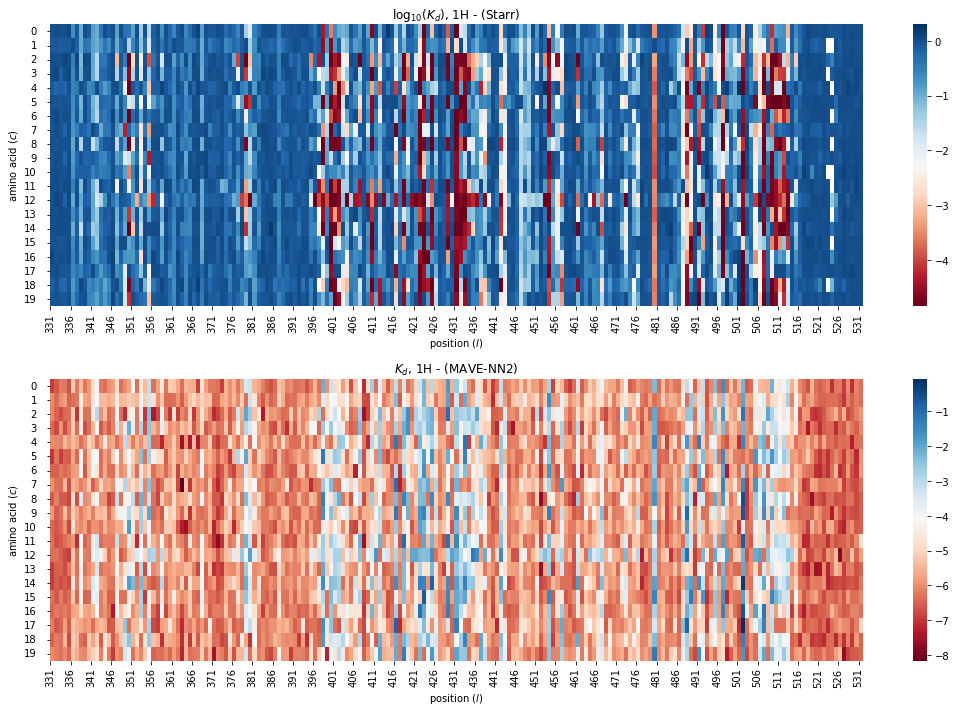

In [51]:
fig, axs = plt.subplots(2,1,figsize=(15,10))
from matplotlib.colors import LogNorm

from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-10**-9, vcenter=10**-6.5, vmax=10**-5)
#pcolormesh(your_data, cmap="coolwarm", norm=divnorm)

data = (bloom_bind_df.values.ravel())
log_norm = LogNorm(vmin=min(data), vmax=max(data))
ax = axs[0]
sns.heatmap((bloom_bind_df.values.T),
            ax=ax,
            cmap='RdBu',
            #norm=log_norm
            #norm=divnorm
            #norm=norm
           )

ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
ax.set_title(f'$\log_{{10}}(K_d)$, 1H - (Starr)')
#ax.set_yticklabels(Adams_ordering,rotation=0)



ax = axs[1]
data = np.log10(mavenn2_Kd.values.ravel())
log_norm = LogNorm(vmin=min(data), vmax=max(data))

sns.heatmap(np.log10(mavenn2_Kd.values.T)+7,
            ax=ax,
            cmap='RdBu',
            #norm=log_norm
            #norm=divnorm
            #norm=norm
           )

ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
ax.set_title(f'$K_d$, 1H - (MAVE-NN2)')
#ax.set_yticklabels(Adams_ordering,rotation=0)

fig.tight_layout()
# fig.savefig('pngs/Titeseq_MP/Adams_Kd_vs_Mavenn2_Kd_heatmaps.png',
#             facecolor='white', edgecolor='none',
#             dpi=200,bbox_inches='tight')


Text(0.5, 0, '$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\\phi)}^{-1}$')

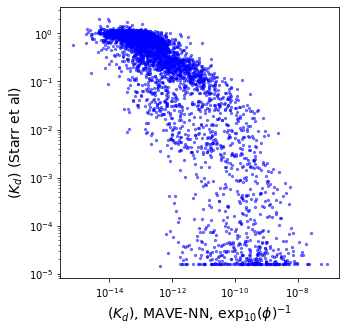

In [52]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(mavenn2_Kd.values.ravel(),10**bloom_bind_df.values.ravel()
            ,s=5,alpha=0.5,color='blue')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylabel('$\log_{10}(K_d)$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$\log_{10}(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

ax.set_ylabel('$(K_d)$ (Starr et al)',fontsize=14)
ax.set_xlabel('$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

In [53]:
# fig, ax = plt.subplots(figsize=(5,5))


# # lims=[10**-12,10**-1]
# # ax.plot(lims,lims,'--',color='orange',lw=2)

# Rsq = np.corrcoef(1/(10**((phi_single_mutants))),
#             10**(bloom_bind_df.values.ravel()))[0,1]**2

# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(np.log10(1/10**((phi_single_mutants))),
#            (bloom_bind_df.values.ravel()),
#             color='blue',s=5,alpha=0.25)
# #ax.set_xscale('log')
# #ax.set_yscale('log')

# ax.set_ylabel('$K_d$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)
# # ax.set_xlim(lims)
# # ax.set_ylim(lims)
# fig.tight_layout()
# # fig.savefig('pngs/__/__.png',
# #             facecolor='white', edgecolor='none',
# #             dpi=200,bbox_inches='tight')


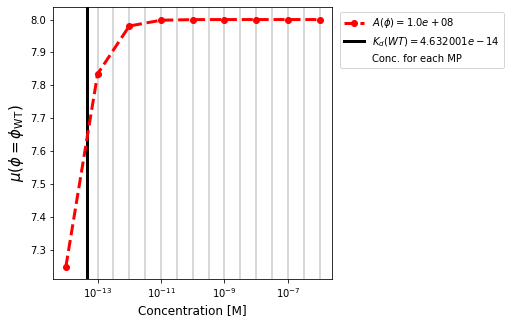

In [54]:
fig, ax = plt.subplots(figsize=(5,5))

phi_WT = gpmap.x_to_phi(WT_seq)
cs_ = np.arange(10**-13,10**-7,10**(-11))
cs_course = np.arange(10**-12,10**-1,10**(-7))
cs_fig_1  = np.array([10**(-14),10**(-13),10**(-12),10**(-11),10**(-10),10**(-9),10**(-8),10**(-7),10**(-6)])

#for a in as_list:
#ax.plot(cs_course,(mu_of_phi(c=cs_course,a=a,phi=phi_WT)),lw=3,zorder=10,label=f'$A(\phi) = {(10**a):.1e}$')    
ax.plot(cs_fig_1,(mu_of_phi(c=cs_fig_1,a=a,phi=phi_WT)),'ro--',lw=3,zorder=10,label=f'$A(\phi) = {(10**a):.1e}$')    

ax.set_xlabel('Concentration [M]',fontsize=12)
ax.set_ylabel('$\mu(\phi = \phi_{\\rm WT})$',fontsize=15)

Kd_WT = 1/(10**phi_WT)
ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
for c in cs:    
    ax.axvline(c,c='gray',zorder=-10,alpha=0.4)
    
ax.axvline(c,c='gray',label=f'Conc. for each MP',zorder=-10,alpha=0.0)    

leg = ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
for lh in leg.legendHandles: 
    lh.set_alpha(1)


ax.set_xscale('log')
#ax.set_xlim(10**-13,max(cs))    
#ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

fig.savefig('mu_phi_WT_vs_conc.png',dpi=300,bbox_inches='tight')


In [55]:
Kd_WT

4.6320007746692034e-14